## Number Recognition Using Nerual Network

In [165]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

MNIST Dataset already Spilt Their Data into Training and Testing

In [166]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

Training Data -- 60,000


Testing  Data --  10,000

In [167]:
print((X_train.shape,y_train.shape),(X_test.shape,y_test.shape))

((60000, 28, 28), (60000,)) ((10000, 28, 28), (10000,))


In [190]:
type(X_train)

numpy.ndarray

Prining The 10th image array

In [168]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

Pixel of Grayscale Image Dimension -- 28 X 28

In [169]:
print(X_train[10].shape)

(28, 28)


Display The 10th Image along with Label

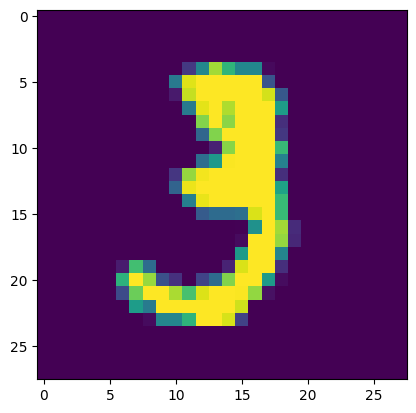

In [191]:
plt.imshow(X_train[10])
plt.show()

In [192]:
print(y_train[10])

3


In [171]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Scaling The Pixel Value From 0 - 255 To 0 - 1

In [172]:
X_train = X_train/255
X_test = X_test/255

Bulit The Nerual Network with Layers

In [173]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

Compile The Nerual Network Model

In [174]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train The Nerual Network

Eposhs means how many times our model go through the data

In [175]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3005 - accuracy: 0.9122
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1400 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1019 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0816 - accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0675 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0571 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0488 - accuracy: 0.9842
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0390 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.035

Evaluate The Nerual Network

In [193]:
loss,accuracy = model.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.1074 - accuracy: 0.9732


Training Data Accuracy --- 98.9%


Testing Data Accuracy ---  97.3%

In [194]:
print(accuracy*100)

97.32000231742859


Get The Predictive Labels

In [177]:
y_pred = model.predict(X_test)


313/313 [==============================] - 1s 2ms/step


10,000 Image with 10 Label each of the image
[0,1,2,3,4,5,6,7,8,9]

In [178]:
print(y_pred.shape)

(10000, 10)


Display The First Entry Datapoint in X_test

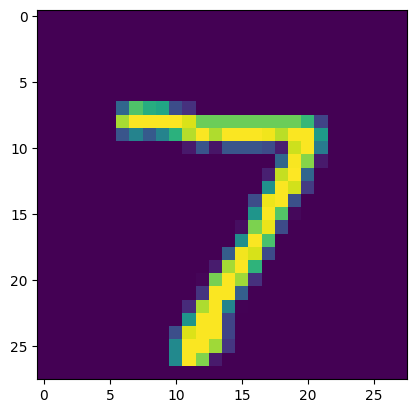

In [179]:
plt.imshow(X_test[0])
plt.show()

Original Value of First Entry of Testing Dataset

In [180]:
print(y_test[0])

7


Probability of The every labels

In [181]:
print(y_pred[0])

[3.9955977e-04 2.0118685e-02 6.3228226e-01 9.5744425e-01 9.7783243e-08
 4.2974263e-01 4.9996979e-06 9.9999958e-01 2.3078565e-03 1.4217976e-01]


Maximum Probability of That Label Dataset of First Entry

In [182]:
maximum_probability_label_first_test_image=np.argmax(y_pred[0])
print(maximum_probability_label_first_test_image)

7


Maximum Probability of Index in Label Dataset

In [183]:
all_y_pred_labels=[np.argmax(i)for i in y_pred]
print(all_y_pred_labels)
print(len(all_y_pred_labels))

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 5, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion Matrix

In [184]:
confu_mat = confusion_matrix(y_test,all_y_pred_labels)
print(confu_mat)

tf.Tensor(
[[ 955    0    4    1    2    7    3    1    5    2]
 [   0 1116    5    1    0    2    2    3    6    0]
 [   1    1 1008    4    2    1    1    8    6    0]
 [   0    0    4  979    0   11    0    4    6    6]
 [   0    0    5    0  968    2    2    2    0    3]
 [   2    1    0    6    1  875    3    0    3    1]
 [   0    2    2    1    8   11  931    0    3    0]
 [   1    2    7    0    5    0    0 1005    2    6]
 [   1    1    3    6   10   16    1    5  927    4]
 [   0    2    1    5   17    4    2    9    1  968]], shape=(10, 10), dtype=int32)


Visualize The Confusion Matrix

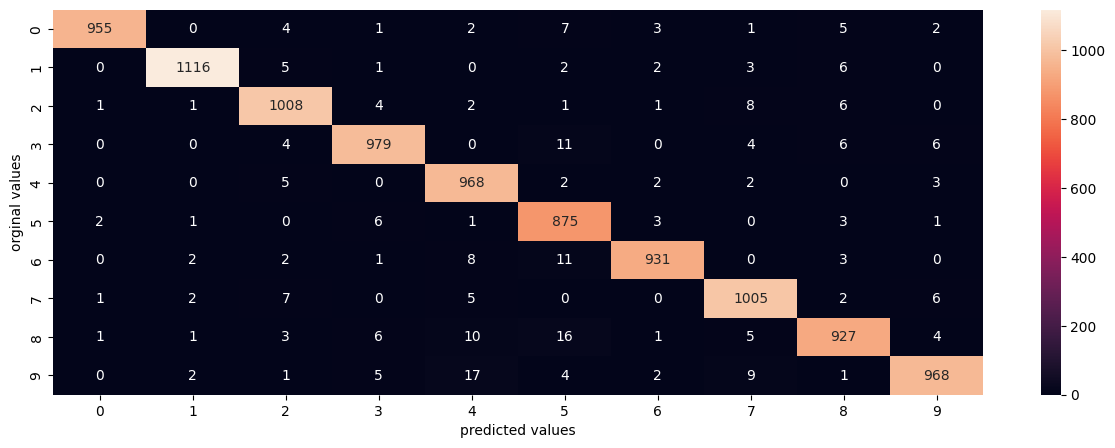

In [185]:
plt.figure(figsize=(15,5))
sns.heatmap(confu_mat,annot=True,fmt='d')
plt.xlabel("predicted values")
plt.ylabel("orginal values")
plt.show()

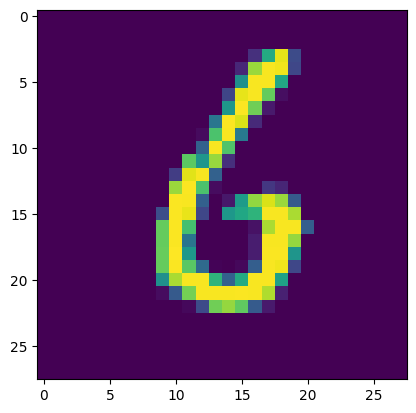

In [186]:
plt.imshow(X_test[50])
plt.show()

In [187]:
print(y_test[50])

6


In [188]:
print(y_pred[50])

[1.4653490e-02 9.4102755e-02 4.8345318e-01 6.3483054e-03 6.5341517e-02
 9.2462593e-01 9.9999297e-01 9.4614246e-05 9.0434715e-02 3.7660790e-05]


In [189]:
maximum_probability_test_particular_label=np.argmax(y_pred[50])
print(maximum_probability_test_particular_label)

6
